<a href="https://colab.research.google.com/github/bhavyajethi/Deep-Learning-practice/blob/main/Transfer_Learning_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

In [11]:
IMAGE_SIZE = [224,224]

# mount drive here

In [12]:
test = '/content/drive/MyDrive/test'
train = '/content/drive/MyDrive/train'

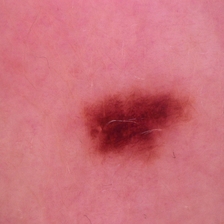

In [13]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imagedis
folder = train+'/benign'

img_name = '/content/drive/MyDrive/train/benign/1000.jpg'
img_path = os.path.join(folder, img_name)

if os.path.exists(img_name):
  display(_Imagedis(filename=img_path, width=240, height=240))
else:
  print("No image file was found in the folder")

# import vgg16 from keras.applications

In [20]:
# import vgg16 from keras.applications
from keras.applications.vgg16 import VGG16
# Channels for color images are typically 3.
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False) # This line requires VGG16 to be defined

In [21]:
vgg.input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor_38>

In [26]:
for layer in vgg.layers:
  layer.trainable = False # False means all layers will be pre trained ans not trained from scrtach



In [29]:
import glob
folders = glob.glob('/content/drive/MyDrive/train/*')
print(len(folders))

2


In [31]:
x = Flatten()(vgg.output)
pred = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=pred)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [33]:
from keras import optimizers
adam = optimizers.Adam()
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

test_data = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

In [37]:
train_set = train_data.flow_from_directory(train,
                                           target_size = (224,224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 2647 images belonging to 2 classes.


In [38]:
test_set = test_data.flow_from_directory(test,
                                           target_size = (224,224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 660 images belonging to 2 classes.


In [40]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath = 'model.h5',
                             verbose = 2,
                             save_best_only = True)
callbacks = [checkpoint]

In [41]:
epochs = 10
steps_per_epoch = 5
validation_steps = 32

history = model.fit(
    train_set,
    validation_data = test_set,
    epochs = epochs,
    steps_per_epoch = steps_per_epoch,
    validation_steps = validation_steps,
    callbacks = callbacks,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.5930 - loss: 2.1647 
Epoch 1: val_loss improved from inf to 1.73846, saving model to model.h5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


5/5 ━━━━━━━━━━━━━━━━━━━━ 630s 148s/step - accuracy: 0.6025 - loss: 2.1444 - val_accuracy: 0.7667 - val_loss: 1.7385
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.8666 - loss: 0.9448 
Epoch 2: val_loss did not improve from 1.73846
5/5 ━━━━━━━━━━━━━━━━━━━━ 72s 18s/step - accuracy: 0.8648 - loss: 0.9718 - val_accuracy: 0.8167 - val_loss: 2.0495
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.7836 - loss: 2.1830 
Epoch 3: val_loss did not improve from 1.73846
5/5 ━━━━━━━━━━━━━━━━━━━━ 114s 24s/step - accuracy: 0.7854 - loss: 2.1923 - val_accuracy: 0.7803 - val_loss: 2.2996
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.7814 - loss: 2.2371 
Epoch 4: val_loss did not improve from 1.73846
5/5 ━━━━━━━━━━━━━━━━━━━━ 101s 24s/step - accuracy: 0.7845 - loss: 2.2019 - val_accuracy: 0.8136 - val_loss: 1.8709
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.8066 - loss: 2.2778 
Epoch 5: val_loss did not improve from 1.73846
5/5 ━━━━━━━━━━━━━━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 84s 20s/step - accuracy: 0.8165 - loss: 1.7191 - val_accuracy: 0.8015 - val_loss: 1.4654
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.7203 - loss: 2.0153 
Epoch 8: val_loss did not improve from 1.46536
5/5 ━━━━━━━━━━━━━━━━━━━━ 72s 17s/step - accuracy: 0.7305 - loss: 1.9427 - val_accuracy: 0.7182 - val_loss: 2.3812
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.6525 - loss: 4.3186 
Epoch 9: val_loss did not improve from 1.46536
5/5 ━━━━━━━━━━━━━━━━━━━━ 80s 19s/step - accuracy: 0.6656 - loss: 4.0578 - val_accuracy: 0.7803 - val_loss: 1.7788
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.7897 - loss: 1.9684 
Epoch 10: val_loss did not improve from 1.46536
5/5 ━━━━━━━━━━━━━━━━━━━━ 58s 14s/step - accuracy: 0.7914 - loss: 1.9560 - val_accuracy: 0.7667 - val_loss: 2.2581


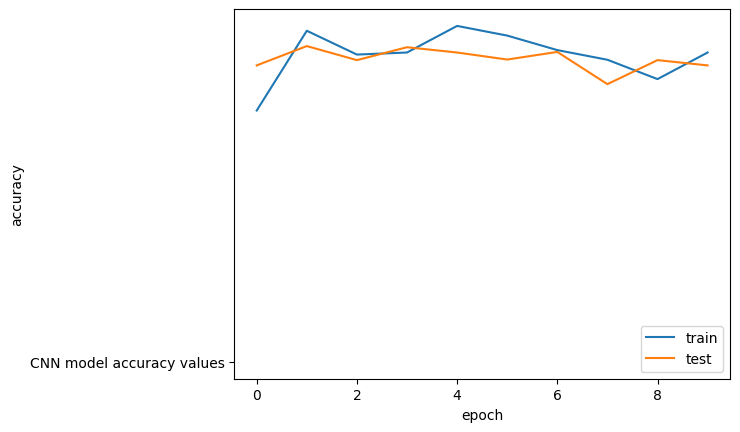

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.plot('CNN model accuracy values')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()